In [27]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import LineString
from shapely.ops import polygonize
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

# get the street network for Mt. Lebanon, PA
G = ox.graph_from_place('Mt. Lebanon, PA', network_type='drive')

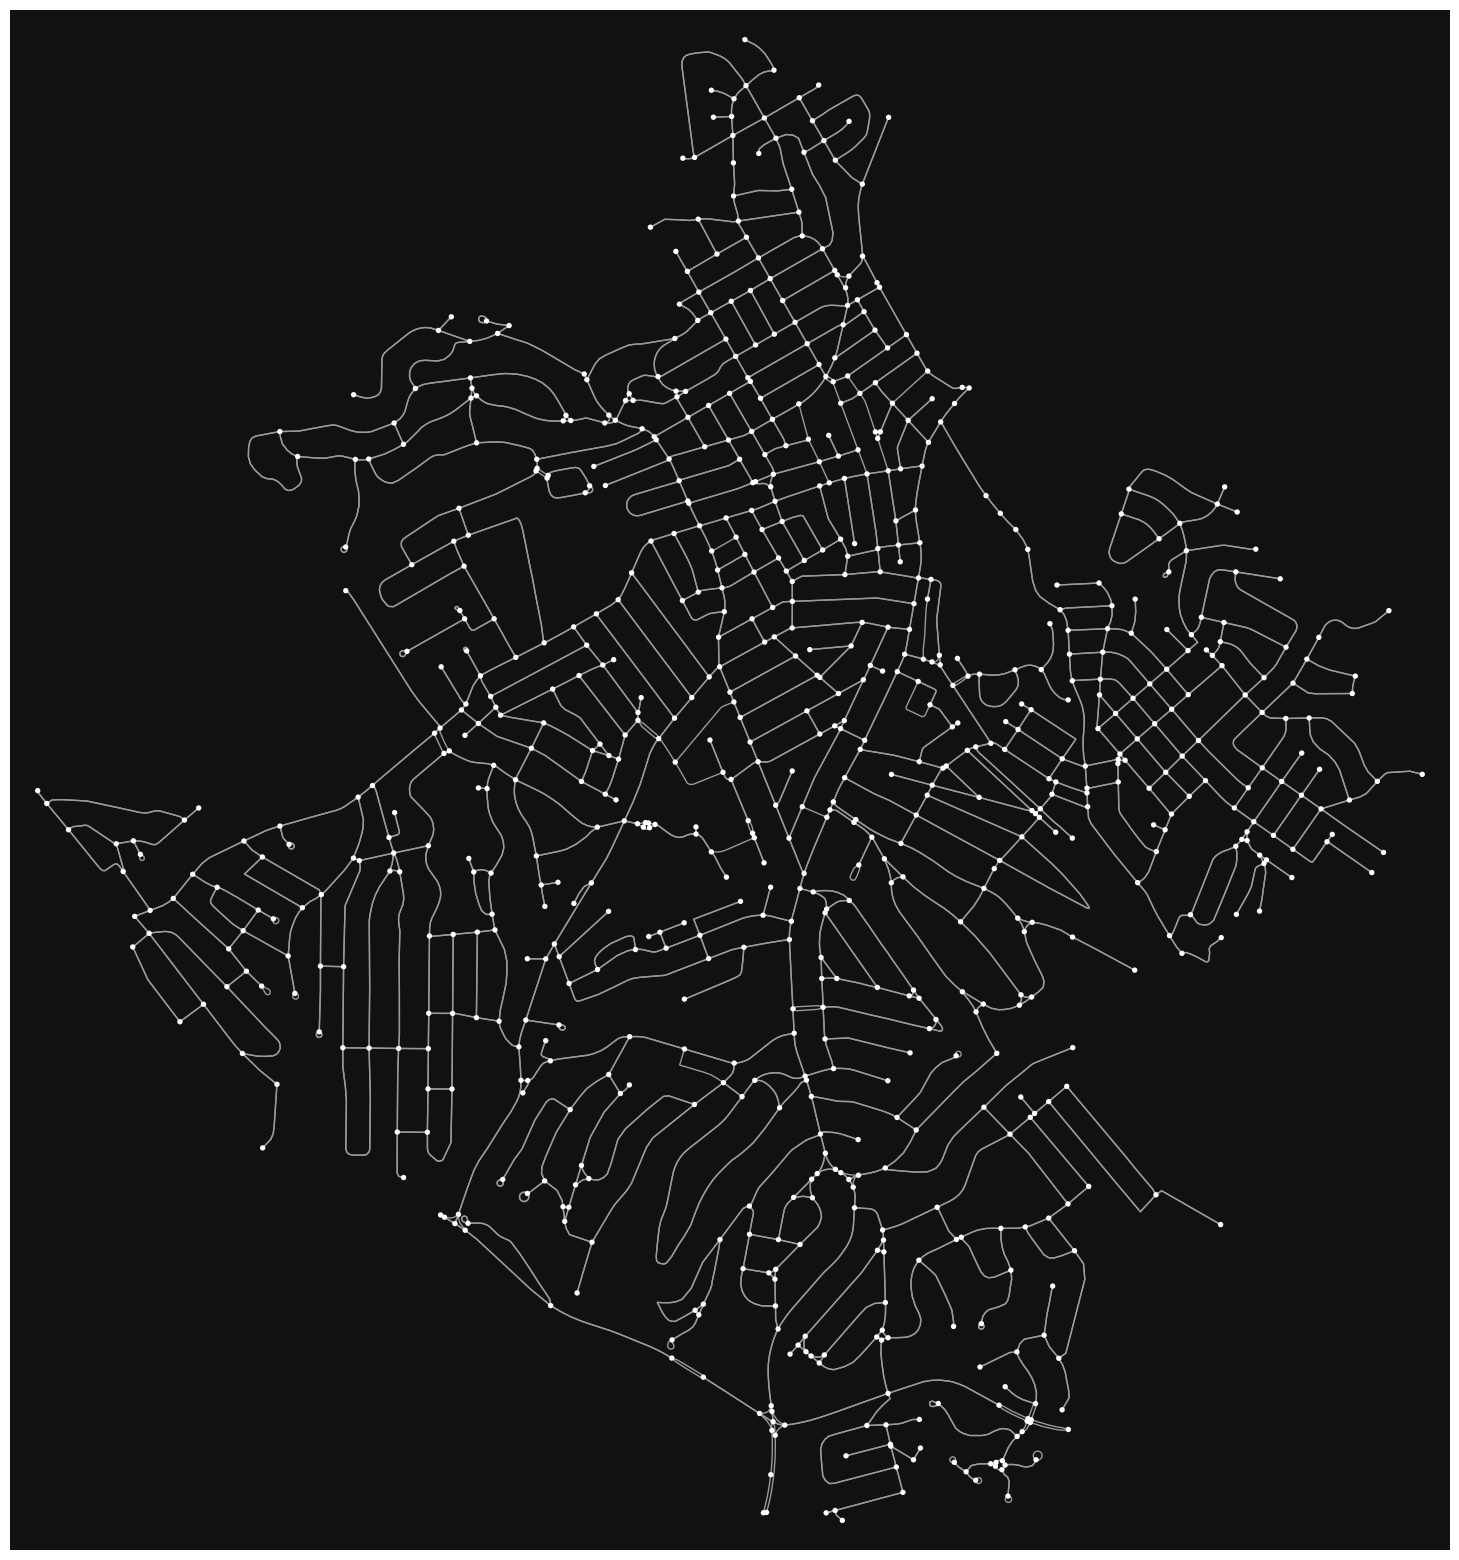

In [28]:
# plot the network
fig, ax = ox.plot_graph(G, dpi=1200, show=False, close=False, figsize=(20, 20))
plt.show()


C:\Users\sulli\AppData\Local\Temp\ipykernel_22904\1426498352.py:7: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  boundary = gdf.unary_union.convex_hull


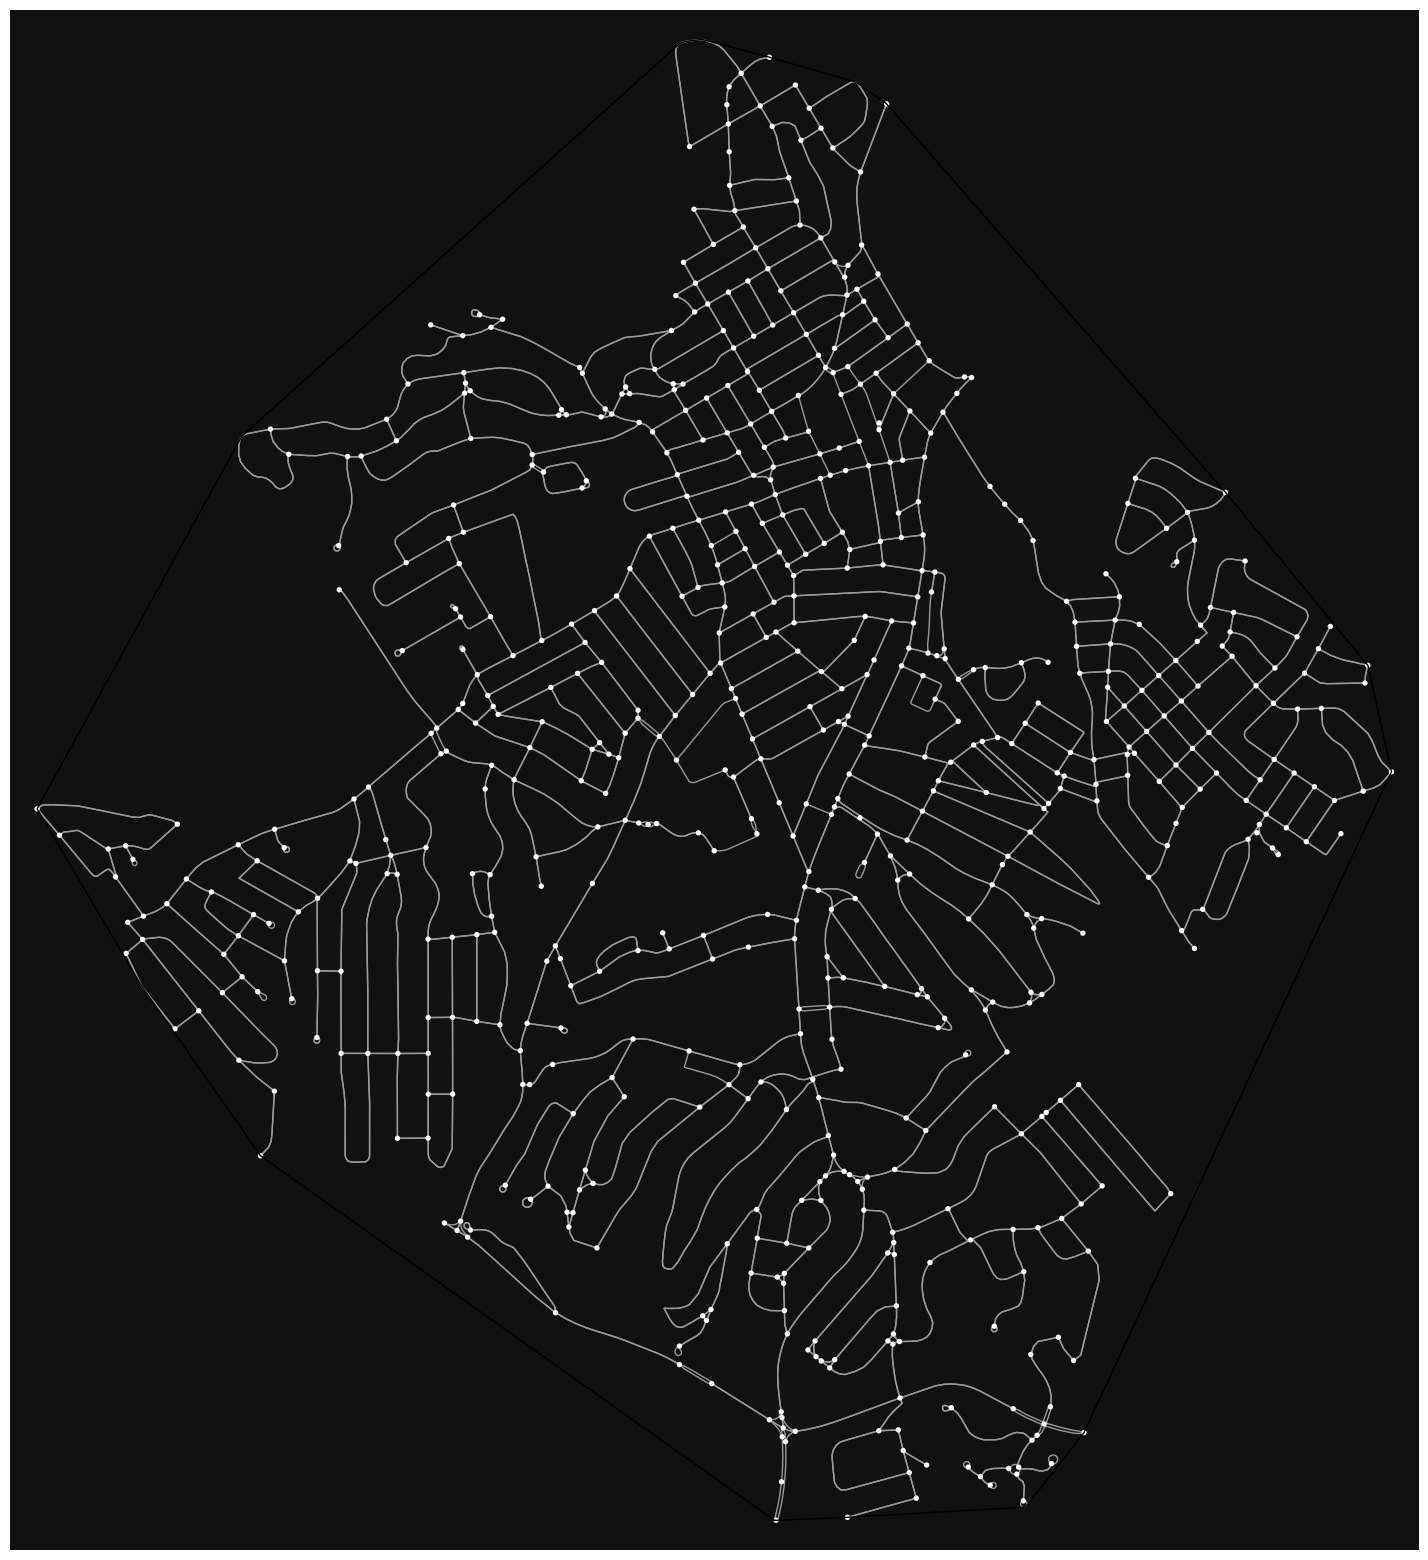

In [36]:
# eliminate dead-end streets and plot
G1 = ox.simplification.consolidate_intersections(ox.project_graph(G))
fig, ax = ox.plot_graph(G1, dpi=1200, show=False, close=False, figsize=(20, 20))

# highlight the outer boundary of the street network
gdf = ox.graph_to_gdfs(G1, nodes=False, edges=True)
boundary = gdf.unary_union.convex_hull
if not boundary.exterior.is_ccw:
    boundary = boundary.buffer(0)
ax.plot(*boundary.exterior.xy, color='black', linewidth=1)

plt.show()



